
##**GUIA 2**



In [ ]:
#!pip install findiff
import numpy as np
from typing import Callable
from findiff import FinDiff
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import ode
import scipy
from math import floor
from matplotlib import gridspec
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl


## **La ecuación de Burgers**





La ecuación de Burgers

\begin{equation}
    \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} - \nu \frac{\partial^2 u}{\partial x^2} = 0.                          
\end{equation}

Forma parte de un grupo de ecuaciones no-lineales en derivadas parciales
"universales" que aparecen en muchos contextos.

En rigor, fue introducida en 1915 por Bateman [1], quien propuso una
solución de estado estacionario para el problema. Más
tarde, en 1948, el físico holandés J. M. Burgers, propuso
esta ecuación como modelo matemático de turbulencia [2,
3] y debido a su amplia contribución, la ecuación lleva su
nombre. A pesar de ser una versión simplificada de la ecuación de Navier Stokes,
se caracteriza por tener un término
dependiente del tiempo, un término de advección y un
término de difusión, con lo cual guarda la no-linealidad y las principales características de esta.
Se utiliza muchas veces como modelo de juguete para testear implementaciones numéricas de flujos turbulentos.

En su forma mas general (con el término de difusión) la ecuación es del tipo parabólica, mientras que en el caso ideal (invisido) es una ecuación hiperbólica. En ambos casos, resulta útil buscar leyes de conservación, de camino a las soluciones.

[1] Bateman, H., Some recent researches on the motion of
fluids, Monthy Wather Rev. 43, 163-170 (1915).

[2] Burgers, J. M., A mathematical model illustrating the
theory or turbulence, Advances in Applied Mechanics 1,
171-199 (1948).

[3] Burgers, J. M., Mathematical examples illustrating
relations occuring in the theory of turbulent fluid motion,
Trans. Roy. Neth. Acad. Sci. Amsterdam 1. 17, 1-53
(1939).

## **Ejercicio 1**


$\bf a)$ Mostrar que esta ecuación conserva el momento incluso para $\nu \neq 0$.

$\bf b)$ A partir de la ecuación de balance mostrá la conservación local de la energía. ¿Bajo que condiciones se conserva la energía global?

$\bf c)$ Explica la aparición de "frentes" a partir de la ecuación para la evolución de los gradientes. (*Ayuda: esto puede hacerce derivando la ecuación de Burgers con respecto de x*)

$\bf d)$ Mediante la sustitución: $u(x,t) = -2\nu \partial_x\phi/\phi$ (transformación de Hopf) es posible hallar la solución exacta de (1). Escribí la ecuación. Que tipo de soluciones tiene? Describí la aparición de frentes en términos de estas soluciones.



---
**Resolución aqui**


---

a) Comencemos reordenando la ecuación, con $ \nu \neq 0 $:

\begin{equation}
    \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} - \nu \frac{\partial^2 u}{\partial x^2} = 0                          
\end{equation}

La expresamos como

$$ \boxed{\frac{\partial u}{\partial t} + \frac{\partial}{\partial x} \left(\frac{u^2}{2} -  \nu \frac{\partial u}{\partial x} \right) = 0} $$

donde usé que $ \displaystyle u \frac{\partial u}{\partial x} = \frac{\partial}{\partial x} \left(\frac{u^2}{2} \right) $. Entonces, esta ecuación, que está en función de derivadas primeras y se encuentra igualada a $0$, constituye una ecuación de balance. Notemos que:

$$ \frac{d}{dt} \int\limits^L_0 u \,dx = - \int\limits^L_0 \frac{ \partial}{\partial x} \left(\frac{u^2}{2} - \nu \frac{\partial u}{\partial x} \right) = \left. \left( \frac{u^2}{2} - \nu \frac{\partial u}{\partial x} \right) \right|^L_0 = 0 $$

donde la nulidad de esta última expresión depende de elegir condiciones de contorno adecuadas.

b) Tomamos $\nu = 0$. Entonces, la ecuación de burgers resulta:

$$ \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0 $$

Si multiplicamos a ambos lados por $u$, podemos reescribirla como:

$$ \partial_t \left(\frac{u^2}{2} \right) + u \, \partial_x \left(\frac{u^2}{2} \right) = 0 $$

De aquí, reconocemos la aparición de la **derivada total** $d_t = \partial_t + u \partial_x$. De forma tal que:

$$ \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0 = d_t \left(\frac{u^2}{2} \right) $$

que es la ley de balance **local**. Entonces, podemos asociar $\displaystyle \frac{dE}{dt} = d_t \left(\frac{u^2}{2} \right)$. Con lo cual, al considerar $\nu \neq 0$, la ley de balance que buscamos se expresa:

$$ \boxed{\frac{dE}{dt} =   \nu uu_{xx}} $$

Donde hemos reemplazado la expresión de $\displaystyle \frac{dE}{dt}$ en la ecuación de Burgers original.

Para la forma **global**, notemos que, con $\nu \neq 0$, además de poder escribir la ecuación de Burgers a partir de una derivada total, también es válida la escritura:

$$ \partial_t \left(\frac{u^2}{2} \right) + \partial_x \left(\frac{u^3}{3} \right) = 0  $$

De forma similar al inciso $\bf a)$, pasamos el término de la derivada espacial al otro lado de la ecuación e integramos en $x$

$$ \partial_t \int\limits^L_0 \frac{u^2}{2} \,dx = - \int\limits^L_0 \partial_x \left(\frac{u^3}{3} \right) \,dx = \left. \frac{u^3}{3} \right|^L_0 = 0 $$

De nuevo, la nulidad de esta última expresión vale para condiciones de contorno adecuadas (condiciones de contorno donde la velocidad es nula en los bordes, o es periódica). Como el término $\displaystyle \frac{u^2}{2}$ representa la energía, si la integral de $\displaystyle \frac{u^3}{3}$ es nula, eso implicará que la energía sea constante y, por lo tanto, se conservará.

Integramos la ecuación de Burgers con $\nu \neq 0$; obtenemos:

$$ \int\limits_0^L \frac{d}{dt} \left(\frac{u^2}{2} \right) \, dx = \int\limits \nu u u_{xx} \, dx $$

Entonces, para el término izquierdo de esta exresión tenemos:

$$ \int\limits_0^L \frac{d}{dt} \left(\frac{u^2}{2} \right) \, dx = \int\limits_0^L \left[\partial_t \left(\frac{u^2}{2} \right) + u \partial_x \left( \frac{u^2}{2} \right) \right] \, dx = \int\limits_0^L \partial_t \left( \frac{u^2}{2} \right) \, dx + \int\limits_0^L u \partial_x \left( \frac{u^2}{2} \right) \, dx$$

Ahora, hago integración por partes:

$$ \int\limits_0^L \frac{d}{dt} \left( \frac{u^2}{2} \right) \, dx = \partial_t \int\limits_0^L \left(\frac{u^2}{2}  \right) \, dx + \int\limits_0^L \partial_x \left( \frac{u^3}{3} \right) \, dx $$

Entonces, transformo, sin pérdida de generalidad, la derivada parcial respecto del tiempo en una derivada convectiva:

$$ \int\limits_0^L \frac{d}{dt} \left( \frac{u^2}{2} \right) \, dx = \frac{d}{dt} \int\limits_0^L \left(\frac{u^2}{2}  \right) \, dx + \int\limits_0^L \partial_x \left( \frac{u^3}{3} \right) \, dx $$

Entonces, si vuelvo a igualar con la ecuación de Burgers, obtenemos:

$$ \frac{d}{dt} \int\limits_0^L \left(\frac{u^2}{2}  \right) \, dx + \int\limits_0^L \partial_x \left( \frac{u^3}{3} \right) \, dx = \int\limits_0^L \nu u u_{xx} \, dx = \nu \int\limits_0^L  \partial_x (u \partial_x u) - (\partial_x u)^2 \, dx $$

Reordenando, se llega a:

$$ \frac{d}{dt} \int\limits_0^L \left(\frac{u^2}{2}  \right) \, dx = \int\limits_0^L \partial_x \left(- \frac{u^3}{3} + \nu u \partial_x u  \right) \, dx - \nu \int\limits_0^L (\partial_x u)^2 \, dx $$

Con lo cual, podemos observar que el primer término proporcional a $u^3$ se anula por condiciones de contorno. Sin embargo, sobreviven todos aquellos que poseen el factor $\nu$; es claro entonces que $\nu = 0$ para que la energía se conserve de forma global.


c) Al derivar respecto de $x$ la ecuación de Burgers, obtenemos:

$$ \partial_t u_x + (u_x)^2 + u\partial_x u_x - \nu \partial_{x} u_{xx} = 0 $$

De aquí, podemos reexpresar varios términos: notamos que $\partial_t u_x + u \partial_x u_x = d_t u_x$ (**derivada total**). Además, notamos que $ \partial_x u_{xx} = \partial_{xx}^2 u_x $. Así, podemos reescribir:

$$ \boxed{d_t u_x = - (u_x)^2 + \nu \partial_{xx}^2 u_x} $$

Esta ecuación, que es una ecuación para cada elemento/parcela de fluído, marca que $\partial_{xx}^2 u_x$ es un término de disipación. Notamos que el término $-(u_x)^2$ es siempre negativo. Entonces, si $u_x > 0$, $u$ evolucionará a una forma suave, pero si $u_x < 0$, entonces $u$ evolucionará a un **choque**, comportamiento que explica así la aparición de *frentes*.

d) En la ecuación de Burgers potencial $\varphi_t=\varphi_x^2/2+\nu\varphi_{xx}$ podemos tomar $u=\partial_x\varphi$ con $\varphi=-2\nu ln(\psi)$ (1) tal que $\psi$ es solución a la ecuación del calor $\psi_t=\nu\psi_{xx}$ (2)

De (1) obtenemos

- $\psi=e^{-\varphi/(2\nu)}$
- $\psi_t = -\frac{\varphi_t}{2\nu}e^{-\varphi/(2\nu)}$
- $\psi_{xx}=\frac{\varphi_x^2}{(2\nu)^2}e^{-\varphi/(2\nu)}-\frac{\varphi_{xx}}{2\nu}e^{-\varphi/(2\nu)}$.

De (2)

$$
-\frac{\varphi_t}{2\nu}e^{-\varphi/(2\nu)} = \frac{\nu\varphi_x^2}{(2\nu)^2}e^{-\varphi/(2\nu)}-\frac{\nu\varphi_{xx}}{2\nu}e^{-\varphi/(2\nu)}\\
-\frac{\varphi_t}{2\nu} = \frac{\nu\varphi_x^2}{(2\nu)^2}-\frac{\nu\varphi_{xx}}{2\nu}\\
\varphi_t = -\frac{\nu\varphi_x}{2}+\nu\varphi_{xx}\\
$$

donde pasamos de la ecuación del calor (2) a la ecuación de Burgers, viendo que son equivalentes.

Luego, puedo resolver la ecuación del calor con solución $\psi$ y $\varphi=-2\nu\ ln(\psi)$. La solución general de la ecuación del calor es

$$
\left\{\begin{matrix}
\psi(x',0)=e^{-1/(2\nu)}\int_{-\infty}^xu(x'',0)\ dx''\\
\psi(x,t)=\frac{1}{\sqrt{4\pi \nu t}}\int_{-\infty}^{+\infty}\psi(x',0)\ e^{-\frac{(x-x')^2}{4\pi \nu t}}\ dx'
\end{matrix}\right.
$$

Juntando todo

$$
\left\{\begin{matrix}
\psi(x',0)=e^{-1/(2\nu)}\int_{-\infty}^xu(x'',0)\ dx''\\
\psi(x,t)=\frac{1}{\sqrt{4\pi \nu t}}\int_{-\infty}^{+\infty}\psi(x',0)\ e^{-\frac{(x-x')^2}{4\pi \nu t}}\ dx'\\
u(x,t)=-2\nu\partial_x\big[ln\big(\psi(x,t)\big)\big]
\end{matrix}\right.
$$

En particular, la ecuación de Burgers admite soluciones de tipo *ondas viajeras*, de la forma

$$ u = \frac{2\omega}{1 + Ae^{\omega(x-\omega t)/\nu}} $$

Precisamente, esta solución representa un frente de ondas que viaja sin deformarse, ya que solo depende de un factor $x - \omega t$ (lineal en $x$). En este caso, el ancho de la onda es $\displaystyle \Delta x = \frac{\nu}{\omega}$. Con esto, se observa que, en la medida que $\nu$ se torne cada vez más pequeño, el ancho tiende a reducirse. Con lo cual, se observa que la onda actúa efectivamente como una onda de choque.


##**Ejercicio 2: Burgers con diferencias finitas**

$\bf a)$ Derivá la expresión para resolver numéricamente la ecuación de Burgers mediante un método de diferencias finitas con un esquema de Euler adelantado como integrador temporal.

$\bf b)$ Implementá numericamente esta expresión para resolver la ecuación en un dominio $[0,2\pi)$ considerando los siguientes parámetros: $\nu = 1\times 10^{-2}$ con $N_x = 512$ puntos de grilla y $\Delta t = 1\times10^{-3}$. Utilizá distintas condiciones iniciales del tipo:

$$ u_0 = sen(ax)$$ \\
$$ u_0 = cos(x) + cos(bx) + sen(ax)$$ \\

con a, b constantes arbitrarias.

$\bf c)$ De qué depende la aparición de los frentes? Siempre se ven? Graficá la solución obtenida ($u(x,t)$) para distintos tiempos sucesivos.

$\bf d)$ Qué sucede si comienzo con una velocidad inicial nula?




---

**Resolucion aqui**

---

$\bf a)$ Utilizamos un paso $h$ para el tiempo, y un paso $\Delta x$ para la posición. En ese sentido, discretizamos el tiempo y la posición con el esquema adelantado, mientras que para la derivada segunda usamos la discretización usual. Así, aproximando la solución en el tiempo como $u_j$, y como $u^i$ en la posición, obtenemos:

$$ \frac{u_{j+1}^i - u_j^i}{h} + u_j^i \frac{u_j^{i+1} - u_j^{i-1}}{2\Delta x} = \nu \frac{u_j^{i+1} - 2u_j^{i} + u_j^{i-1}}{\Delta x^2} $$

Despejando de forma identificada, obtenemos el esquema:

$$ \boxed{u_{j+1}^i = u_j^i - \frac{h}{2 \Delta x} u_j^i (u_j^{i+1} - u_j^{i+1}) + \frac{\nu h}{\Delta x^2} (u_j^{i+1} - 2u_j^{i} + u_j^{i-1})} $$


**Pueden usar las siguientes líneas para implementar el método numérico**

In [ ]:
# Inciso b: defino mi función de Burgers.

def burgers_dif(nx, nt, dt, nu, dx, d):
    u = np.zeros([nx, nt])  # Array con la velocidad
    u[0, :] = 0  # condición de contorno en x=0
    u[nx-1, :] = 0 #  condición de contorno en  x=xmax
    u[:, 0] = d

    B = np.diag(np.ones(nx-1), 1) - np.diag(np.ones(nx-1), -1)
    B[-1,0] = 1
    B[0,-1] = -1

    C = np.diag(-2 * np.ones(nx)) + np.diag(np.ones(nx-1), 1) + np.diag(np.ones(nx-1), -1)
    C[-1,0] = 1
    C[0,-1] = 1

    for i in range(nt-1):
        u[:,i+1] = u[:,i] - dt * (1/(2*dx)) * u[:, i] * np.matmul(B, u[:,i]) + nu * dt * (1/(dx**2)) * np.matmul(C, u[:,i])

    return u


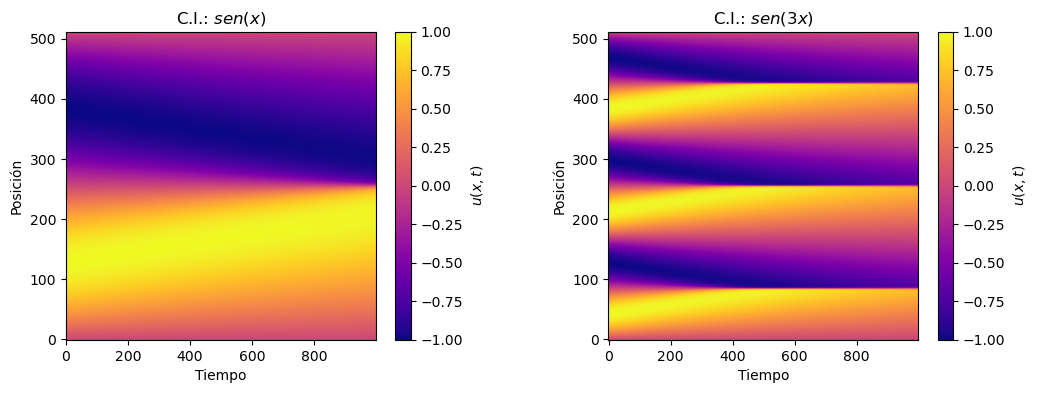

In [ ]:
 # Continuación inciso b, impongo ciertas condiciones iniciales

nx = 512
nt = 1000
dx = 2 * np.pi / (nx - 1)
nu = 0.01
dt = 1e-3

x = np.linspace(0,2*np.pi,nx,endpoint=False)
t = np.arange(nt)*dt

prim = burgers_dif(nx, nt, dt, nu, dx, np.sin(x))
seg = burgers_dif(nx, nt, dt, nu, dx, np.sin(3*x))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

im1 = ax1.imshow(prim, origin='lower', aspect='auto', cmap='plasma')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Posición')
ax1.set_title('C.I.: $sen(x)$')
cbar1 = plt.colorbar(im1, ax=ax1, label='$u(x,t)$')

im2 = ax2.imshow(seg, origin='lower', aspect='auto', cmap='plasma')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Posición')
ax2.set_title('C.I.: $sen(3x)$')
cbar2 = plt.colorbar(im2, ax=ax2, label='$u(x,t)$')


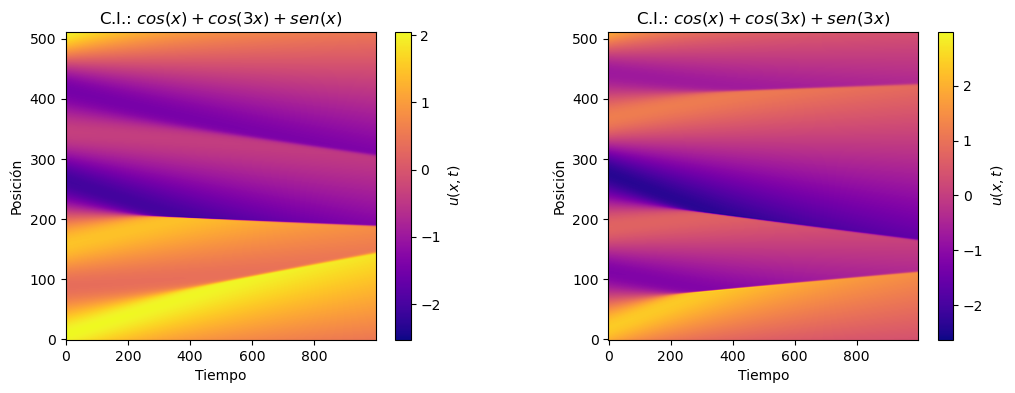

In [ ]:
# Continuación inciso b; impongo otras condiciones iniciales

nx = 512
nt = 1000
dx = 2 * np.pi / (nx - 1)
nu = 0.01
dt = 1e-3

x = np.linspace(0,2*np.pi,nx,endpoint=False)
t = np.arange(nt)*dt

terc = burgers_dif(nx, nt, dt, nu, dx, np.cos(x) + np.cos(3*x) + np.sin(x))
cuart = burgers_dif(nx, nt, dt, nu, dx, np.cos(x) + np.cos(3*x) + np.sin(3*x))

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

im3 = ax3.imshow(terc, origin='lower', aspect='auto', cmap='plasma')
ax3.set_xlabel('Tiempo')
ax3.set_ylabel('Posición')
ax3.set_title('C.I.: $cos(x) + cos(3x) + sen(x)$')
cbar3 = plt.colorbar(im3, ax=ax3, label='$u(x,t)$')

im4 = ax4.imshow(cuart, origin='lower', aspect='auto', cmap='plasma')
ax4.set_xlabel('Tiempo')
ax4.set_ylabel('Posición')
ax4.set_title('C.I.: $cos(x) + cos(3x) + sen(3x)$')
cbar4 = plt.colorbar(im4, ax=ax4, label='$u(x,t)$')


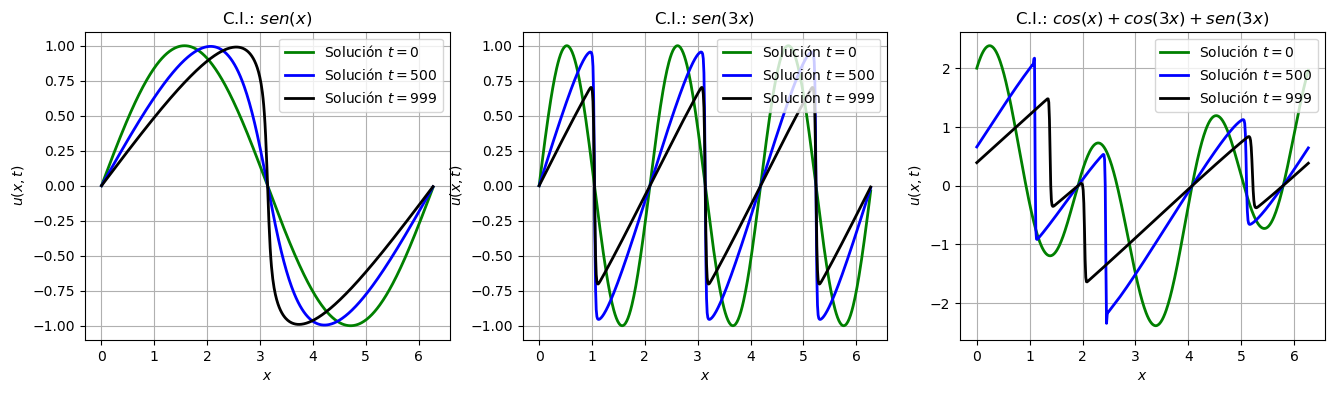

In [ ]:
# Inciso c: graficamos, para distintos tiempos, algunas de las soluciones del ítem anterior.

nx = 512
nt = 1000
dx = 2 * np.pi / (nx - 1)
nu = 0.01
dt = 1e-3

x = np.linspace(0,2*np.pi,nx,endpoint=False)
t = np.arange(nt)*dt

fig, (ax5, ax6, ax7) = plt.subplots(1, 3, figsize=(16, 4))

ax5.plot(x, prim[:, 0], label = 'Solución $t=0$', color='green', linestyle='-', linewidth=2)
ax5.plot(x, prim[:, 500], label = 'Solución $t=500$', color='blue', linestyle='-', linewidth=2)
ax5.plot(x, prim[:, 999], label = 'Solución $t=999$', color='black', linestyle='-', linewidth=2)
ax5.grid(True)
ax5.set_title('C.I.: $sen(x)$')
ax5.set_ylabel('$u(x, t)$')
ax5.set_xlabel('$x$')
ax5.legend(loc='upper right')

ax6.plot(x, seg[:, 0], label = 'Solución $t=0$', color='green', linestyle='-', linewidth=2)
ax6.plot(x, seg[:, 500], label = 'Solución $t=500$', color='blue', linestyle='-', linewidth=2)
ax6.plot(x, seg[:, 999], label = 'Solución $t=999$', color='black', linestyle='-', linewidth=2)
ax6.grid(True)
ax6.set_title('C.I.: $sen(3x)$')
ax6.set_ylabel('$u(x, t)$')
ax6.set_xlabel('$x$')
ax6.legend(loc='upper right')

ax7.plot(x, cuart[:, 0], label = 'Solución $t=0$', color='green', linestyle='-', linewidth=2)
ax7.plot(x, cuart[:, 500], label = 'Solución $t=500$', color='blue', linestyle='-', linewidth=2)
ax7.plot(x, cuart[:, 999], label = 'Solución $t=999$', color='black', linestyle='-', linewidth=2)
ax7.grid(True)
ax7.set_title('C.I.: $cos(x) + cos(3x) + sen(3x)$')
ax7.set_ylabel('$u(x, t)$')
ax7.set_xlabel('$x$')
ax7.legend(loc='upper right')

plt.show()

Notamos que los frentes de onda -ondas de choque-, aparecen en la medida que se le da al sistema un tiempo de evolución considerable. A su vez, notamos que hay mayor formación de frentes en el segundo y tercer gráfico, ya que estos actúan condiciones iniciales que poseen senos y cosenos de mayor frecuencia.  

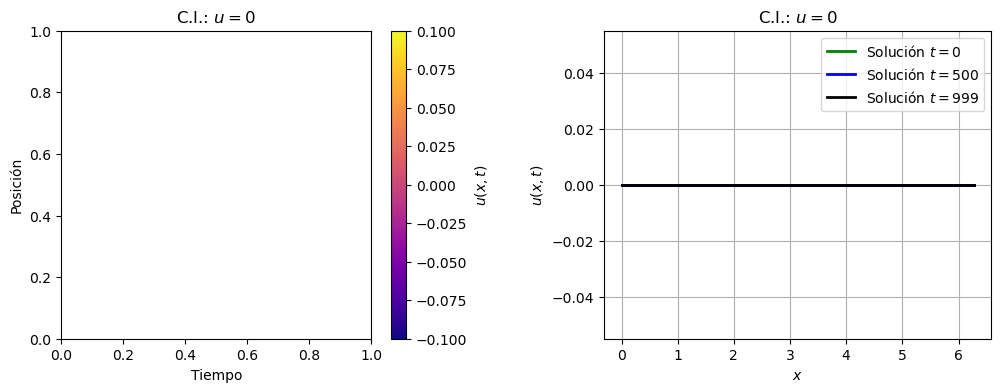

In [ ]:
nx = 512
nt = 1000
dx = 2 * np.pi / (nx - 1)
nu = 0.01
dt = 1e-3

x = np.linspace(0,2*np.pi,nx,endpoint=False)
t = np.arange(nt)*dt

cero = burgers_dif(nx, nt, dt, nu, dx, 0)

fig, (ax8, ax9) = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

im8 = ax3.imshow(cero, origin='lower', aspect='auto', cmap='plasma')
ax8.set_xlabel('Tiempo')
ax8.set_ylabel('Posición')
ax8.set_title('C.I.: $u = 0$')
cbar8 = plt.colorbar(im8, ax=ax8, label='$u(x,t)$')

ax9.plot(x, cero[:, 0], label = 'Solución $t=0$', color='green', linestyle='-', linewidth=2)
ax9.plot(x, cero[:, 500], label = 'Solución $t=500$', color='blue', linestyle='-', linewidth=2)
ax9.plot(x, cero[:, 999], label = 'Solución $t=999$', color='black', linestyle='-', linewidth=2)
ax9.grid(True)
ax9.set_title('C.I.: $u = 0$')
ax9.set_ylabel('$u(x, t)$')
ax9.set_xlabel('$x$')
ax9.legend(loc='upper right')

Si se comienza con una velocidad inicial nula, el sistema no evoluciona en absoluto.

## **Ejercicio 3: Burgers con métodos pseudoespectrales**

Implementá un método de Fourier con condiciones de contorno periódicas en el dominio $x \in [0,2\pi)$ para resolver numericamente la ecuación de Burgers, considerando las mismas condiciones iniciales del ejercicio anterior y utilizando un método de Runge Kutta de orden dos como integrador temporal.

$\bf a)$ Integrá hasta $t_f = 4$ considerando los siguientes parámetros: $\nu = 0$, $N_x = 512$ puntos de grilla y $\Delta t = 1\times10^{-3}$, verificá cualitativamente la solución hallada y estudia la conservación de la energía. *Ayuda: podes calcular la energía (a menos de una constante) dado un arreglo* $u[t,x]$ como `E = np.mean(u**2, axis=1)`

$\bf b)$ Considerando los siguientes parámetros: $\nu = 1\times 10^{-2}$ con $N_x = 512$ puntos de grilla y $\Delta t = 1\times10^{-3}$, graficá la solución obtenida ($u(x,t)$) hasta que la amplitud inicial cae a la mitad. Describi
cualitativamente la dinámica.

$\bf c)$ Que sucede si se  aumenta la viscocidad a $\nu = 1\times 10^{-1}$? Y si se la disminuye a $\nu = 1\times 10^{-3}$?.



---

**Resolución aquí**


---






##**Bloques para la integración temporal**

Pueden completar el siguiente bloque para implementar la evolcuión temporal de la PDE con RK de orden dos y luego el método espectral

In [ ]:
import numpy as np
from tqdm.auto import trange, tqdm
import matplotlib.pyplot as plt

In [ ]:
# a)

#Defino mis puntos en el espacio real y los modos para el espacio de Fourier

ti, tf, dt = 0, 4, 1e-3
nu = 0
N = 512

x = np.linspace(0,2*np.pi,N,endpoint=False) # Coordenada espacial en [0,2*pi)
t = np.arange(ti, tf, dt)                     # Tiempo
k = np.arange(0,N/2+1)                      # Números de onda ordenados como en la FFT

In [ ]:
def evol(u,k,nu,N,dt):
    # Evoluciona en el tiempo la PDE usando el método pseudoespectral y Runge-Kutta de segundo orden
    f  = np.fft.rfft(u)     #vaya al espacio de Fourier
    ft = f
    for ord in [2,1]:       # Bucle para el Runge-Kutta
        D   = dt/ord
        fux = compute_advection(f,k,N)
        f  = ft + D*(-fux - nu * k**2 * ft)     # escriba aquí su integrador temporal
        f[int(N/3):] = 0    # Dealiasing (eliminemos modos espúreos!)
    out = np.fft.irfft(f)  # Vuelva del espacio de Fourier
    return out

def compute_advection(f,k,N):
    # Calcula v*vx (u\nabla)u usando el método pseudoespectral y devuelve el resultado en el espacio Fourier
    fx  = 1j*k*f                     #derivamos
    v   = np.fft.irfft(f)            # vuelva para poder multiplicar!
    vx  = np.fft.irfft(fx)           # eso de arriba
    v   = v*vx
    out = np.fft.rfft(v)
    return out

### **Y ahora la integración numérica!**

In [ ]:
def burgers_pseudo_spect(ti, tf, dt, N, nu, u_inic):
    ti, tf, dt = 0, 4, 1e-3
    N = 512

    x = np.linspace(0,2*np.pi,N,endpoint=False) # Coordenada espacial en [0,2*pi)
    t = np.arange(ti, tf, dt)                     # Tiempo
    k = np.arange(0,N/2+1)                      # Números de onda ordenados como en la FFT

    out = np.zeros((N,len(t)))
    out[:,0] = u_inic(x)
    for i in tqdm(np.arange(out.shape[1]-1)):           # Evolución temporal
        out[:,i+1] = evol(out[:,i],k,nu,N,dt)     #Completa para integrar (mira el bloque anterior)
    E = np.mean(out**2, axis=0)

    return out, E # velocidades[x,t], energias[t]

In [ ]:
u1, E1 = burgers_pseudo_spect(0, 4, 1e-3, 512, 0, lambda x: np.sin(3*x))
u2, E2 = burgers_pseudo_spect(0, 4, 1e-3, 512, 0, lambda x: np.cos(x) + np.cos(3*x) + np.sin(5*x))

  0%|          | 0/3999 [00:00<?, ?it/s]

  0%|          | 0/3999 [00:00<?, ?it/s]

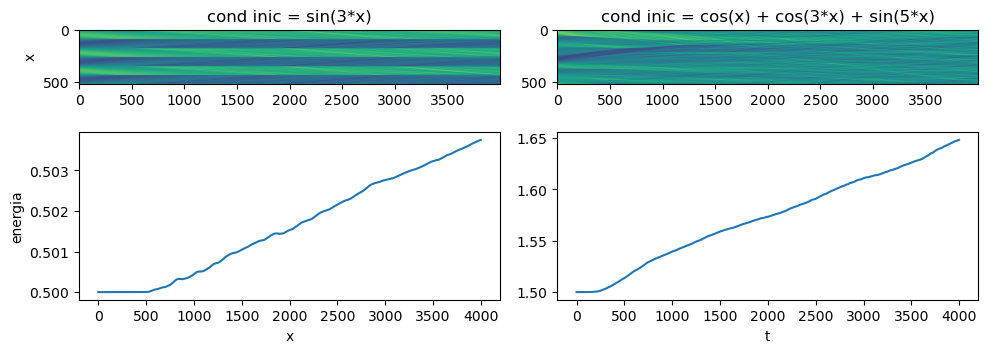

In [ ]:
0005
ax2.imshow(u2)
ax2.set_title('cond inic = cos(x) + cos(3*x) + sin(5*x)')
ax4.plot(E2)
ax4.set_xlabel('t')
plt.tight_layout()

Se puede observar que la energía se conserva hasta que aparecen los frentes de onda, donde las derivadas espaciales divergen. Es entonces que la energía deja de conservarse, debido a que los métodos numéricos introducen errores considerables cuando las derivadas dejan de ser suaves.

In [ ]:
# b)

u3, E3 = burgers_pseudo_spect(0, 4, 1e-3, 512, 1e-2, lambda x: np.sin(3*x))

  0%|          | 0/3999 [00:00<?, ?it/s]

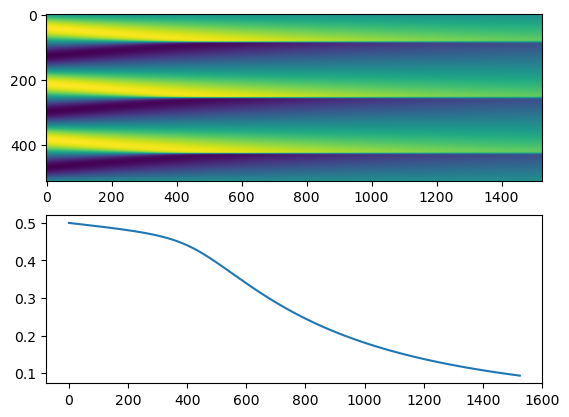

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, dpi=100)

idx = np.where(np.max(u3, axis=0) >= .5*np.max(u3))[0]
ax1.imshow(u3[:,idx])
ax2.plot(E3[idx])

Como era de esperar, se generan frentes de onda, pero con una amplitud promedio que disminuye con el tiempo a causa de $\nu$. Tiene sentido que la energía decrece con la disipación.

In [ ]:
# c)

Nx, dt = 1024, 1e-4
u4, E4 = burgers_pseudo_spect(0, 4, dt, Nx, 1e-1, lambda x: np.sin(3*x))
u5, E5 = burgers_pseudo_spect(0, 4, dt, Nx, 1e-3, lambda x: np.sin(3*x))

  0%|          | 0/3999 [00:00<?, ?it/s]

/var/folders/zf/h5s6j8p12b59t5jqxk0rh7v40000gn/T/ipykernel_2081/3386100122.py:18: RuntimeWarning: overflow encountered in multiply
  v   = v*vx
/var/folders/zf/h5s6j8p12b59t5jqxk0rh7v40000gn/T/ipykernel_2081/2490051556.py:13: RuntimeWarning: overflow encountered in square
  E = np.mean(out**2, axis=0)


  0%|          | 0/3999 [00:00<?, ?it/s]

/var/folders/zf/h5s6j8p12b59t5jqxk0rh7v40000gn/T/ipykernel_2081/3620734987.py:6: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax1.imshow(u4[:,idx4])


Text(0, 0.5, 'energía')

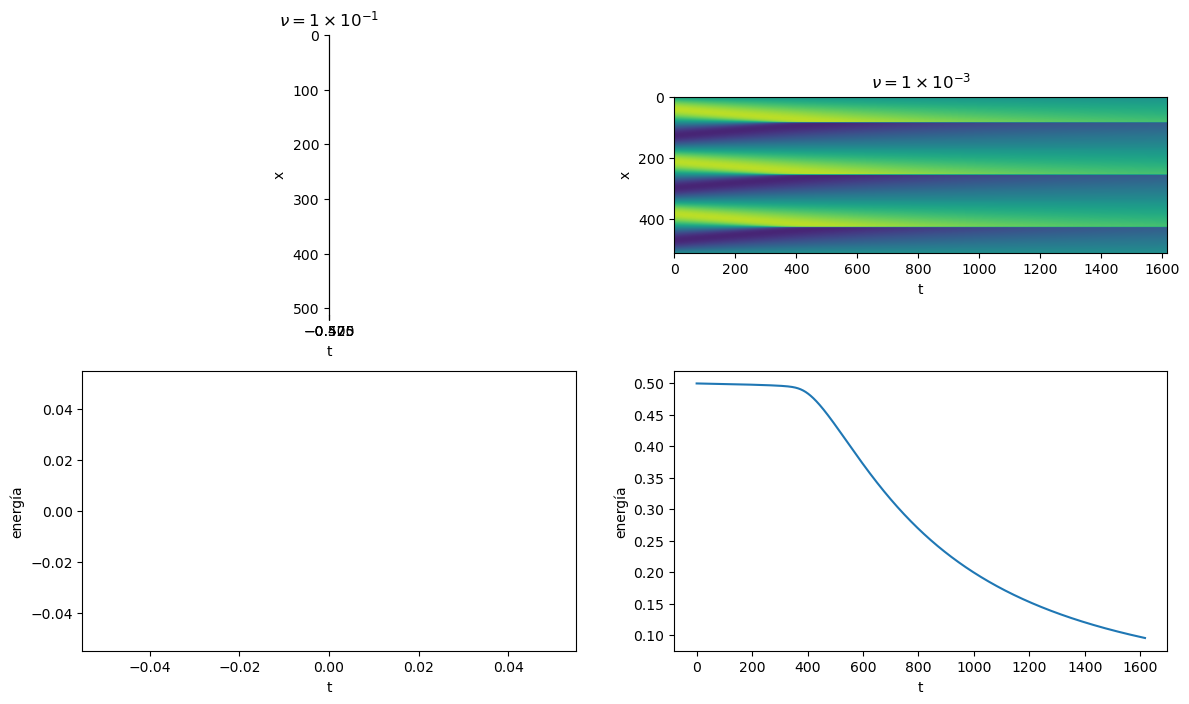

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(14,8), dpi=100)

idx4 = np.where(np.max(u4, axis=0) >= .5*np.max(u4))[0]
idx5 = np.where(np.max(u5, axis=0) >= .5*np.max(u5))[0]

ax1.imshow(u4[:,idx4])
ax3.plot(E4[idx4])
ax1.set_title('$\\nu=1\\times10^{-1}$')
ax1.set_xlabel('t')
ax1.set_ylabel('x')
ax3.set_xlabel('t')
ax3.set_ylabel('energía')

ax2.imshow(u5[:,idx5])
ax4.plot(E5[idx5])
ax2.set_title('$\\nu=1\\times10^{-3}$')
ax2.set_xlabel('t')
ax2.set_ylabel('x')
ax4.set_xlabel('t')
ax4.set_ylabel('energía')


La solución numérica encuentra un overflow cuando se enfrenta a $\nu=1\times10^{-1}$, mientras que no tiene problemas con $\nu=1\times10^{-3}$. Como $\nu$ está derivado por un número chico, mientras $\nu$ sea chico también, no "explota". Si $\nu$, en cambio, es grande, al ser dividido por un número chico ese término comienza a crecer y causa un overflow

## **Ejercicio 4: Burgers con PINNS**

Integre la ecuación de Burgers usando PINNs. En este caso, vamos a utilizar las PINNs como un integrador a partir de las condiciones iniciales.

Para ello, vamos a partir de una condición inicial $u_0(x,0) = \sin ( x)$ con $x \in [0,2 \pi]$. Además, vamos a poner condiciones de contorno tal que $u(0,t) = u(2 \pi,t) = 0$. Estos van a ser los datos que tenemos medidos del problema.


a) Usando la condición inicial descrita y con $\nu = 0$ use una PINN para integrar para $t \in [0,1]$. Grafique la solución de la red para distintos tiempos. Grafique $u(x,t)$ completo en todos los puntos donde evalua la física como una imagen. Interprete lo que ve. ¿Qué diferencias encuentra con lo visto en otros ejercicios? ¿Se cumple la conservación para la integral primera? [importante: Seleccione los parámetros por su cuenta]

b) Repita el punto $a$ pero con $\nu = 1 \times 10^{-2}$. Grafique para distintos tiempos y la matriz de  $u(x,t)$. Compare con la solución obtenida con métodos pseudoespectrales. Describa las diferencias que encuentra.

Importamos las librerías correspondientes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.auto import trange
import matplotlib.pyplot as plt
import matplotlib as mpl

device = torch.device("cuda:0" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
device.type

'mps'

Definimos la clase MLP

In [ ]:
class MLP(torch.nn.Module):
    """
    Multilayer perceptron (MLP) // Perceptríon Multicapa .

    Esta clase define una red neuronal feedforward con múltiples capas ocultas
    lineales, funciones de activación tangente hiperbólica en  las capas ocultas
    y una salida lineal.

    Args:
        sizes (lista): Lista de enteros que especifica el número de neuronas en
        cada capa. El primer elemento debe coincidir con la dimensión de entrada
        y el último con la dimensión de salida.

    Atributos:
        capas (torch.nn.ModuleList): Lista que contiene las capas lineales del MLP.

    Métodos:
        forward(x): Realiza una pasada hacia adelante a través de la red MLP.

    Ejemplo:
        tamaños = [entrada_dim, oculta1_dim, oculta2_dim, salida_dim]
        mlp = MLP(tamaños)
        tensor_entrada = torch.tensor([...])
        salida = mlp(tensor_entrada)
    """
    def __init__(self,sizes):
        super().__init__()
        self.layers = torch.nn.ModuleList()
        for i in range(len(sizes)-1):
            self.layers.append(torch.nn.Linear(sizes[i],sizes[i+1]))
    def forward(self,x):
        h = x
        for hidden in self.layers[:-1]:
            h = torch.tanh(hidden(h))
        output = self.layers[-1]
        y = output(h)
        return y

Definimos las condiciones iniciales y condiciones de contorno

In [ ]:
# la estructura es input[*shape, 2] = (x, t)
# res = pinn(input)
# res[*shape, 1] = (y)
#Condiciones en t = 0
Nx = Nt = 200
tf = 2

t_data_init   =  torch.zeros(Nt).view(-1,1)                  #defina 100 puntosque valga 0  No olvidar .view(-1,1)
x_data_init   =  torch.linspace(0, 2*np.pi, Nx).view(-1,1)   #defina 100 puntos entre 0 y 2pi No olvidar .view(-1,1)
input_init_y   =  torch.sin(x_data_init.view(-1)).view(-1,1).to(device) #defina la condicion inicial     No olvidar .view(-1,1)
input_init_xt = torch.cat((x_data_init.flatten().view(-1,1), t_data_init.flatten().view(-1,1)), dim=1).to(device) #Junta las condiciones iniciales para que tengan la forma correcta

In [ ]:
#condiciones de contorno
t_data_cc    = torch.cat((torch.linspace(0,tf,Nt), torch.linspace(0,tf,Nt)), dim = 0).view(-1,1) #100 puntos temporales dos veces
x_data_cc    = 2*torch.pi* torch.cat((torch.zeros(Nx), torch.ones(Nx)), dim = 0).view(-1,1) #100 puntos en 0 y 100 en 1
input_cc_y   = torch.cat((torch.zeros(Nx), torch.zeros(Nt)), dim = 0 ).view(-1,1).to(device) #200 puntos que valen 0
input_cc_xt  = torch.cat((x_data_cc.flatten().view(-1,1), t_data_cc.flatten().view(-1,1)), dim=1).to(device) #Los juntamos para que pueda ser input la red

Definimos los puntos para evaluar la física. Estos deberán ser una grilla de 100x100 en el tiempo y el espacio.

In [ ]:
t_physics = torch.linspace(0, tf, Nt)       #100 puntos de 0 a 1
x_physics = torch.linspace(0, 2*np.pi, Nx) #100 puntos de 0 a 2 pi
x_grid, t_grid = torch.meshgrid(x_physics, t_physics, indexing='ij')
x_grid = x_grid[:,:,None].requires_grad_(True).to(device) #Agregamos una dimensión al final para que pueda ser input de la red
t_grid = t_grid[:,:,None].requires_grad_(True).to(device) #Agregamos una dimensión al final para que pueda ser input de la red
input_physics = torch.cat((x_grid, t_grid), dim=-1).to(device)

Defina la red y el optimizador. Se recomienda para empezar a explorar una red con $8$ capas ocultas con $20$ neuronas cada una. Use el peso relativo entre la física y lo demás como 1.

In [ ]:
#Definición de la red y optimizador
nu = 0

lr = 5e-5

pinn = MLP([2] + ([20]*8) + [1]).to(device)
optimizer = torch.optim.Adam(pinn.parameters(),lr=lr)

Complete con lo que sea necesario el loop de entrenamiento

In [ ]:
iterations =  10_000 #Numero de iteraciones
l =           1e-1     #Peso relativo lambda

pbar = trange(iterations)
for epoch in pbar:
    optimizer.zero_grad()

    #Condiciones iniciales
    yh =      pinn(input_init_xt) #Evalue las condiciones iniciales en la red
    loss1 =   torch.mean((yh-input_init_y)**2) #Defina este error como el MSE de la condición inicial
    #condiciones de contorno
    yh =       pinn(input_cc_xt) #Evalue las condiciones de contorno en la red
    loss2 =    torch.mean((yh-input_cc_y)**2) #Defina este error como el MSE de las condiciones de contorno
    #Condiciones de la física
    yhp =      pinn(input_physics) #Evalue las colocaciones de la física en la red
    dx  = torch.autograd.grad(yhp, x_grid, torch.ones_like(yhp), create_graph=True)[0] # computamos u_x
    #dx2 = torch.autograd.grad(dx, x_grid, torch.ones_like(yhp), create_graph=True)[0] # computamos u_xx
    dt  = torch.autograd.grad(yhp, t_grid, torch.ones_like(yhp), create_graph=True)[0] # computamos u_t
    physics =  dt + yhp*dx #- nu*dx2 #Complete con la ecuación diferencial
    loss3 =    torch.mean(physics**2) #Defina este error como el MSE de la ecuación diferencial en las colocaciones pesado por l
    loss = loss1 + loss2 + l * loss3  #Sumamos todos los errores
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        with torch.autograd.no_grad():
            #print(epoch,'CI',float(loss1), 'CC', float(loss2), 'Física:',float(loss3),"Traning Loss:",float(loss.data))
            pbar.set_description(f'Loss: {loss.data:.4e}, loss1: {loss1:.3e}, loss2: {loss2:.3e}, loss3: {loss3:.3e}')
            pbar.refresh()
torch.save(pinn.state_dict(), 'pinn.pth')

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
ys = pinn(input_physics).detach().cpu().numpy().reshape((Nx,Nt))

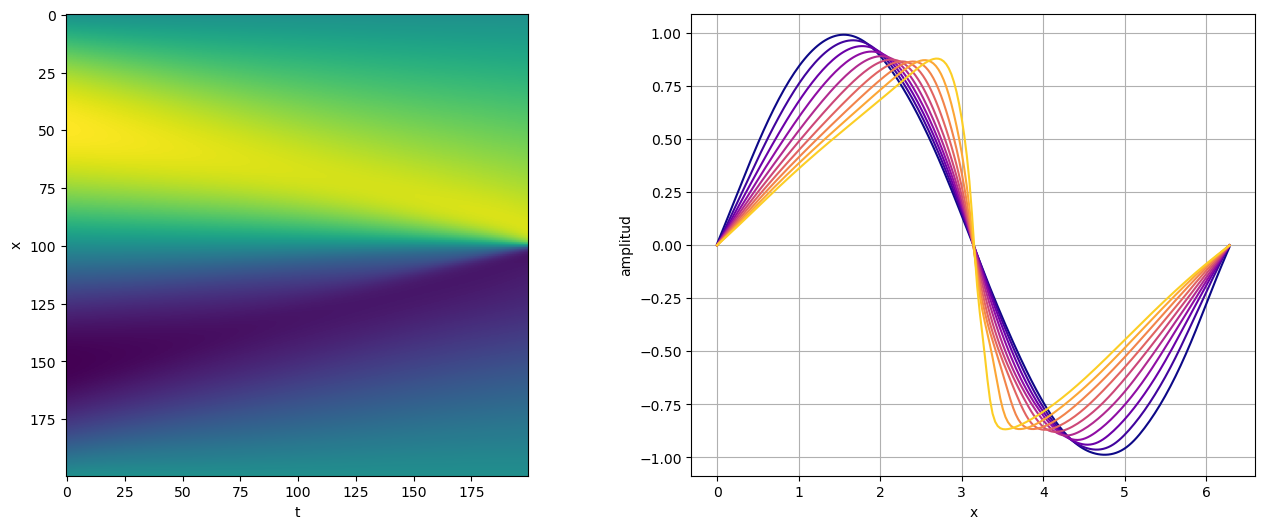

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), dpi=100)

ax1.imshow(ys)
ax1.set_xlabel('t')
ax1.set_ylabel('x')

cmap = plt.get_cmap('plasma')
for ti in range(0, Nt, Nt//10):
    ax2.plot(x_physics.detach().cpu().numpy(), ys[:,ti], color=cmap(ti/Nt))
ax2.set_xlabel('x')
ax2.set_ylabel('amplitud')
ax2.grid()

In [ ]:
E_t = np.sum(ys**2, axis=0)

Text(0, 0.5, 'energía global')

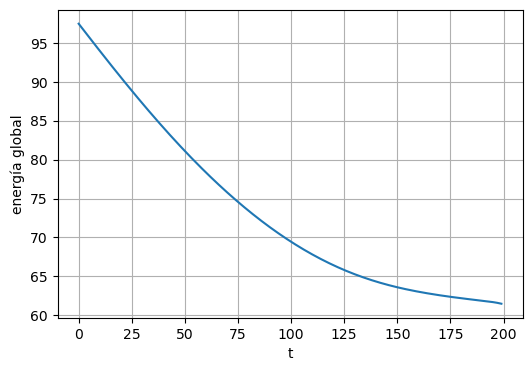

In [ ]:
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(E_t)
plt.grid()
plt.xlabel('t')
plt.ylabel('energía global')

La conservación de la primera integral no es perfecta como se ve en la anterior figura. Posiblemente con más entrenamiento o mejores parámetros la PINN sea capaz de imitar la conservación de energía con mayor precisión. Observamos que a medida que dejábamos que la PINN se entrenara más y más, la curva de enrgía tenía un decrecimiento total menor. Quizá un un peso del error físico más grande y más tiempo de entrenamiento podríamos haber logrado que la energía se conserve

In [ ]:
#Definición de la red y optimizador
nu = 1e-2

lr = 5e-5

pinn_nu = MLP([2] + ([20]*8) + [1]).to(device)
optimizer_nu = torch.optim.Adam(pinn_nu.parameters(),lr=lr)

In [ ]:
iterations =  15_000 #Numero de iteraciones
l =           1e-1   #Peso relativo lambda

pbar = trange(iterations)
for epoch in pbar:
    optimizer_nu.zero_grad()

    #Condiciones iniciales
    yh =      pinn_nu(input_init_xt) #Evalue las condiciones iniciales en la red
    loss1 =   torch.mean((yh-input_init_y)**2) #Defina este error como el MSE de la condición inicial
    #condiciones de contorno
    yh =       pinn_nu(input_cc_xt) #Evalue las condiciones de contorno en la red
    loss2 =    torch.mean((yh-input_cc_y)**2) #Defina este error como el MSE de las condiciones de contorno
    #Condiciones de la física
    yhp =      pinn_nu(input_physics) #Evalue las colocaciones de la física en la red
    dx  = torch.autograd.grad(yhp, x_grid, torch.ones_like(yhp), create_graph=True)[0] # computamos u_x
    dx2 = torch.autograd.grad(dx, x_grid, torch.ones_like(yhp), create_graph=True)[0] # computamos u_xx
    dt  = torch.autograd.grad(yhp, t_grid, torch.ones_like(yhp), create_graph=True)[0] # computamos u_t
    physics =  dt + yhp*dx - nu*dx2 #Complete con la ecuación diferencial
    loss3 =    torch.mean(physics**2) #Defina este error como el MSE de la ecuación diferencial en las colocaciones pesado por l
    loss = loss1 + loss2 + l * loss3  #Sumamos todos los errores
    loss.backward()
    optimizer_nu.step()

    if epoch % 100 == 0:
        with torch.autograd.no_grad():
            #print(epoch,'CI',float(loss1), 'CC', float(loss2), 'Física:',float(loss3),"Traning Loss:",float(loss.data))
            pbar.set_description(f'Loss: {loss.data:.4e}, loss1: {loss1:.3e}, loss2: {loss2:.3e}, loss3: {loss3:.3e}')
            pbar.refresh()
torch.save(pinn.state_dict(), 'pinn_nu.pth')

  0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
ys_nu = pinn_nu(input_physics).detach().cpu().numpy().reshape((Nx,Nt))

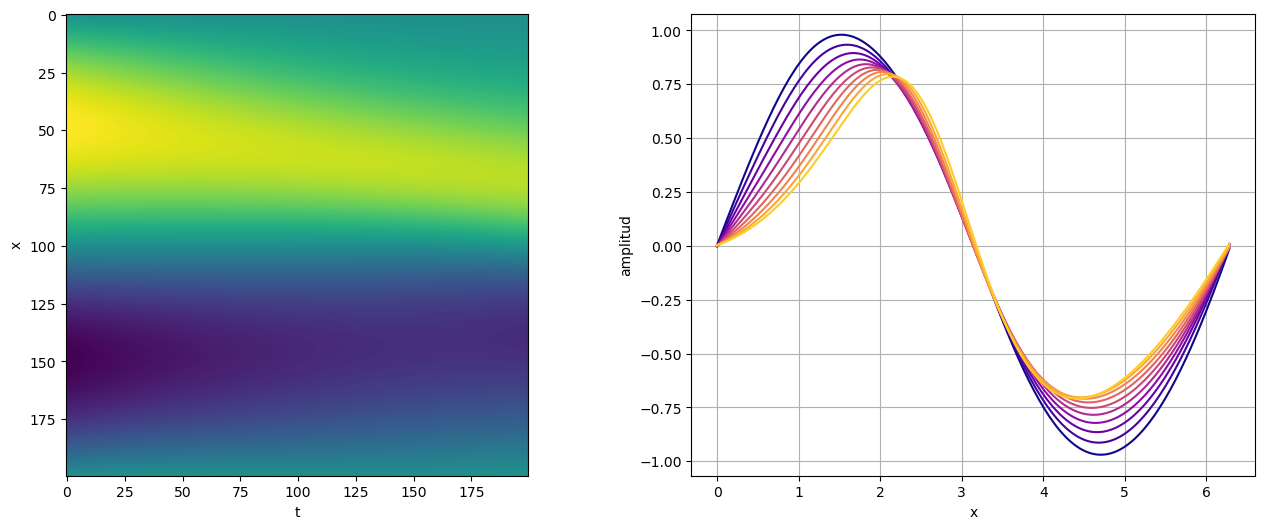

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), dpi=100)

ax1.imshow(ys)
ax1.set_xlabel('t')
ax1.set_ylabel('x')

cmap = plt.get_cmap('plasma')
for ti in range(0, Nt, Nt//10):
    ax2.plot(x_physics.detach().cpu().numpy(), ys_nu[:,ti], color=cmap(ti/Nt))
ax2.set_xlabel('x')
ax2.set_ylabel('amplitud')
ax2.grid()

## **Ejercicio 5: Ecuación de Kardar-Parisi-Zhang** (Burgers potencial)

La ecuación de Burgers en forma potencial puede hallarse considerando $\overline{u} = \overline{\nabla}\phi$:

\begin{equation*}
    \frac{\partial \phi}{\partial t} + \frac{1}{2}(\overline{\nabla}\phi)^2 - \nu \nabla^2 \phi.
\end{equation*}

A partir de esto, el modelo de Kardar-Parisi-Zhang (KPZ) se obtiene mediante un cambio de variables simple para $\phi(x,t)$ y agregando difusión y ruido al azar:

\begin{equation*}
    \frac{\partial h}{\partial t} + \frac{\lambda^2}{2}(\overline{\nabla}h)^2 - \nu \nabla^2 h + \eta,
\end{equation*}

donde $\eta$ representa un ruido Gaussiano.

Dada la versión lineal de KPZ (Burgers potencial) con forzado aleatorio

\begin{equation*}
    \frac{\partial \phi}{\partial t} +  \frac{1}{2}(\frac{\partial \phi}{\partial x})^2-\nu \frac{\partial^2 \phi}{\partial x^2}+\eta
\end{equation*}

donde $\eta(x,t)$ es ruido aleatorio con valor medio nulo, se pide:

$\bf a).$ Integrá la ecuación con condiciones de contorno periódicas entre $x \in [0,2\pi)$, partiendo de una velocidad inicial nula y un ruido aleatorio con valor medio nulo. Como integrador temporal puede usarse Runge Kutta de orden 2.


$\bf b).$ Graficá la evolución en $(x,t)$, la evolcuión  para distintos t ($u(x,t)$ vs $t$) y zoom sucesivos para el ultimo tiempo. Describí cualitativamente la dinámica.

$\bf c)$ Cómo recupero Burgers? Graficá al menos una solución (alcanza con una condición inicial y una evolución de la misma para un tiempo) que sea como las que obtuviste en los ejercicios anteriores. Explicá (o escribí explicitamente en tu implementacion numérica) de que forma obtuviste esta solución.







##**Bloques para la integración temporal**

Pueden completar el siguiente bloque para la integración temporal.
Tengan en cuenta que pueden reciclar bastante del ejercicio anterior

In [ ]:
import numpy as np
from tqdm.auto import trange, tqdm
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

In [ ]:
# Inciso a

def evol(u,k,nu,N,dt):
    # Evoluciona en el tiempo la PDE usando el método pseudoespectral y Runge-Kutta de segundo orden
    f   = np.fft.rfft(u)
    ft  = f
    eta = compute_random(N) # Calculamos el ruido para cada iteración completa de Runge-Kutta
    for ord in [2,1]:       # Bucle para el Runge-Kutta
        D   = dt/ord
        fx  = 1j*k*f        # Derivada espacial de u en el espacio Fourier
        fnl = compute_vv(fx)
        f   = ft + D*(-0.5 * fnl - nu * k**2 * f + eta)            #integrador temporal
        f[int(N/3):] = 0    # Dealiasing
    out = np.fft.irfft(f)
    return out

def compute_vv(fx):
    out = np.fft.rfft(np.fft.irfft(fx)**2)
    return out

def compute_random(N):
    # Genera ruido Gaussiano con media nula y varianza unitaria en el espacio Fourier
    phase  = 2*np.pi*np.random.rand(int(N/2+1))
    ampl   = np.random.randn(int(N/2+1))
    out    = ampl * np.sin(phase)
    out[0] = 0.0
    return out


In [ ]:
def KPZ_pseudo_spect(ti, tf, dt, N, nu, u_inic):

    x = np.linspace(0,2*np.pi,N,endpoint=False) # Coordenada espacial en [0,2*pi)
    t = np.arange(ti, tf, dt)                     # Tiempo
    k = np.arange(0,N/2+1)                      # Números de onda ordenados como en la FFT

    out = np.zeros((N,len(t)))
    out[:,0] = u_inic(x)
    for i in tqdm(np.arange(out.shape[1]-1)):           # Evolución temporal
        out[:,i+1] = evol(out[:,i],k,nu,N,dt)     #Completa para integrar (mira el bloque anterior)
    E = np.mean(out**2, axis=0)

    return out*1000, E*1000 # velocidades[x,t], energias[t]

In [ ]:
phi1, phiE1 = KPZ_pseudo_spect(0, 1, 1e-3, 512, 0.01, lambda x: 0)

  0%|          | 0/999 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


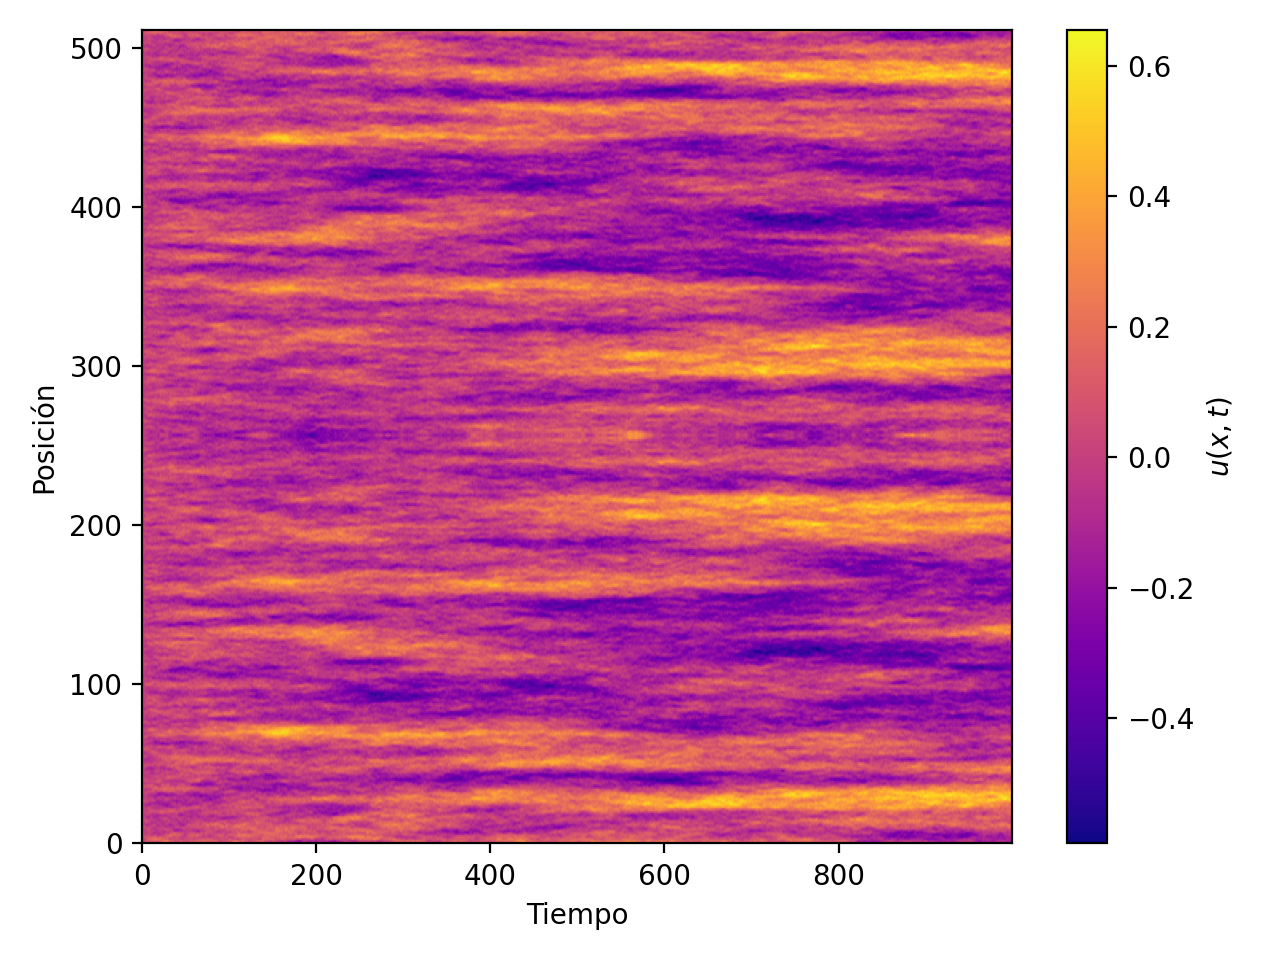

In [ ]:
# Hago el plot

fig, ax1 = plt.subplots()
im1 = ax1.imshow(phi1, origin='lower', aspect='auto', cmap='plasma')
ax1.set_ylabel('Posición')
ax1.set_xlabel('Tiempo')
cbar2 = plt.colorbar(im1, ax=ax1, label='$u(x,t)$')
plt.tight_layout()

Text(6.8, 4.5, 'Tiempo')

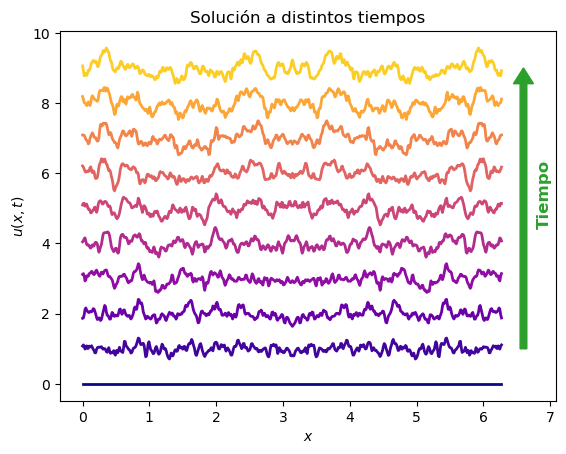

In [ ]:
# b)
N = 512
x = np.linspace(0,2*np.pi,N,endpoint=False)

cmap = plt.get_cmap('plasma')
for ti in range(0, phi1.shape[1], 100):
    plt.plot(x, phi1[:,ti] + ti/100, color=cmap(ti/phi1.shape[1]), linewidth=2)
    plt.grid()
    plt.title('Solución a distintos tiempos')
    plt.ylabel('$u(x, t)$')
    plt.xlabel('$x$')
plt.arrow(6.6,1,0,8, width=.1, length_includes_head=True, color='tab:green', zorder=10)
plt.text(6.8, 4.5, 'Tiempo', rotation='vertical', fontsize='large', color='tab:green', fontweight='bold')

<IPython.core.display.Javascript object>


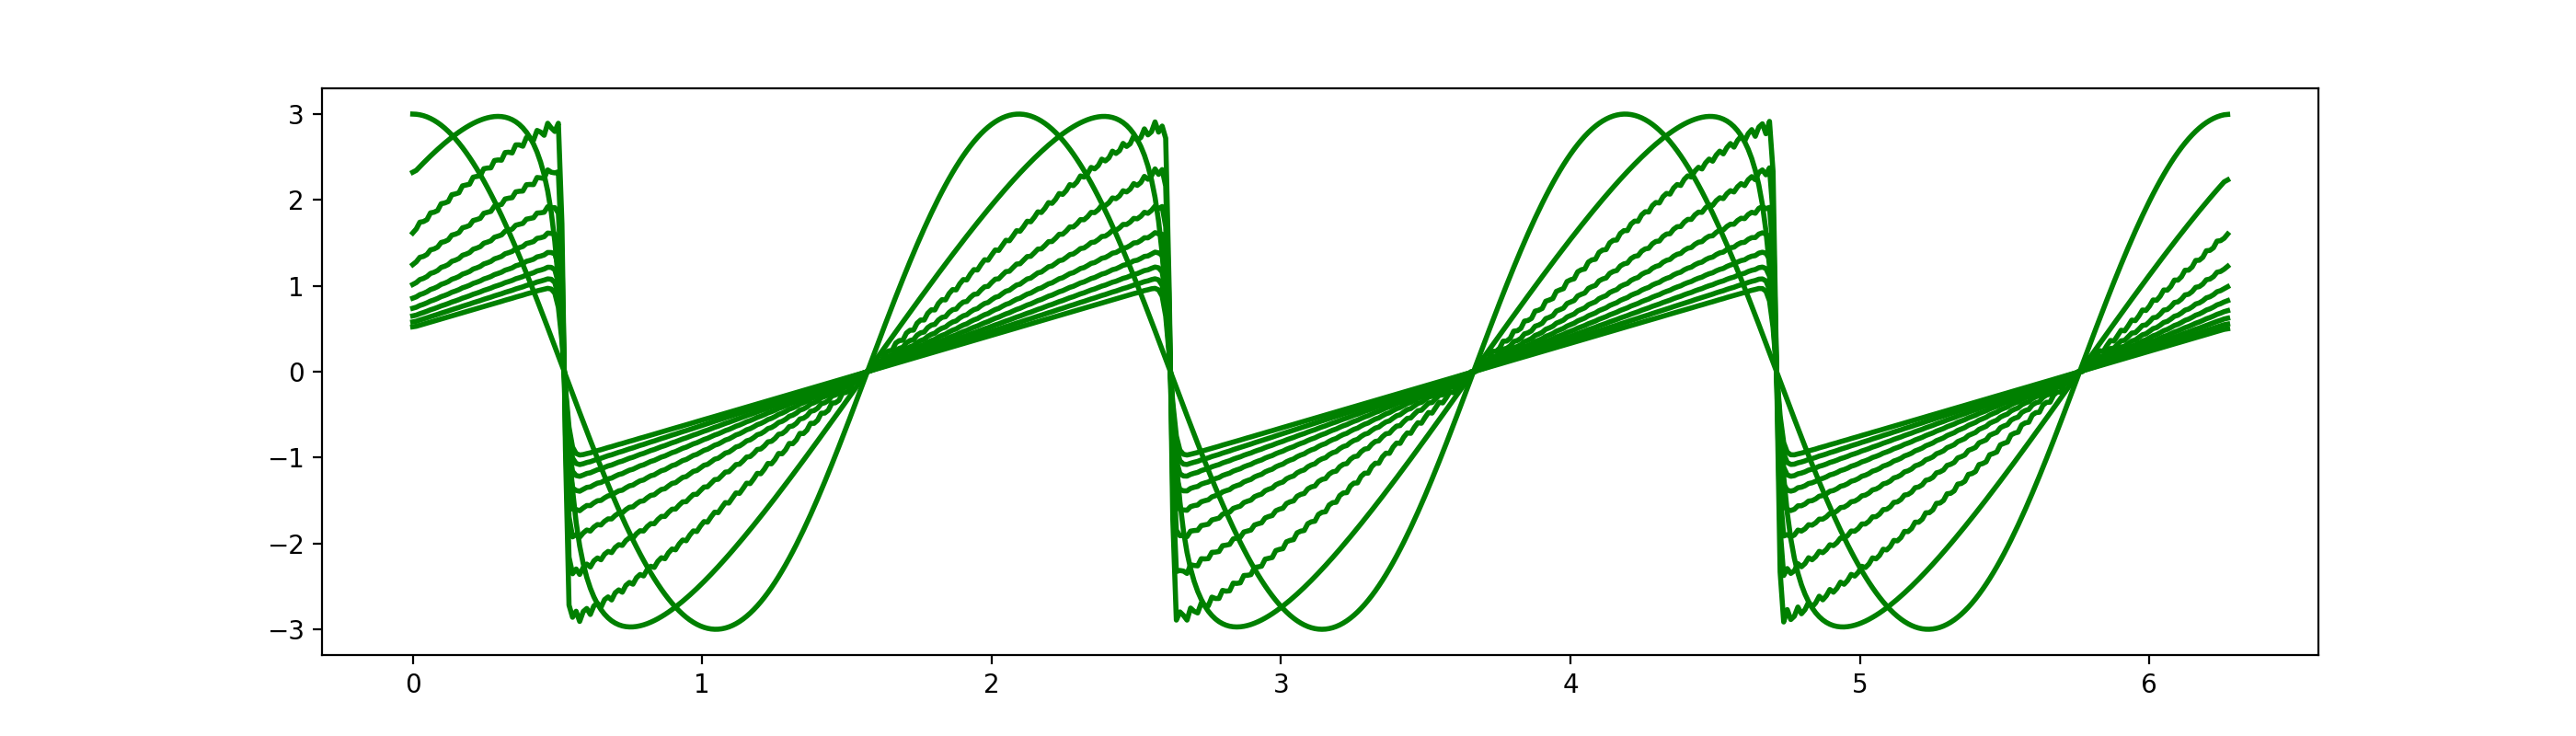

In [ ]:
# Hacemos zooms sucesivos en la última solución

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize=(14, 4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax1.plot(x, phi1[:, 999], "-o" , label = 'Solución zoom $[2, 4]$', color='green', linewidth=2)
ax1.set_xlim(2, 4)
ax1.grid(True)
ax1.set_title('Solución')
ax1.set_ylabel('$u(x, t)$')
ax1.set_xlabel('$x$')
ax1.legend(loc='upper right')


ax2.plot(x, phi1[:, 999], "-o", label = 'Solución zoom $[2.50, 3.50]$', color='green', linewidth=2)
ax2.set_xlim(2.50, 3.50)
ax2.grid(True)
ax2.set_title('Solución')
ax2.set_ylabel('$u(x, t)$')
ax2.set_xlabel('$x$')
ax2.legend(loc='upper right')


ax3.plot(x, phi1[:, 999], "-o", label = 'Solución zoom $[2.8, 3.2]$', color='green', linewidth=2)
ax3.set_xlim(2.8, 3.2)
ax3.grid(True)
ax3.set_title('Solución')
ax3.set_ylabel('$u(x, t)$')
ax3.set_xlabel('$x$')
ax3.legend(loc='upper right')

plt.show()

Cualitativamente, observamos que la dinámica de estas soluciones siguen un patrón *autosimilar* o repetitivo. En particular, no poseen un comportamiento suave, sino más bien un comportamiento "picudo" o fractal.

In [ ]:
def evolburgers(u,k,nu,N,dt):
    # Evoluciona en el tiempo la PDE usando el método pseudoespectral y Runge-Kutta de segundo orden
    f   = np.fft.rfft(u)
    ft  = f
    eta = compute_random(N) # Calculamos el ruido para cada iteración completa de Runge-Kutta
    for ord in [2,1]:       # Bucle para el Runge-Kutta
        D   = dt/ord
        fx  = 1j*k*f        # Derivada espacial de u en el espacio Fourier
        fnl = compute_vv(fx)
        f   = ft + D*(-0.5 * fnl - nu * k**2 * f)            #integrador temporal
        f[int(N/3):] = 0    # Dealiasing
    out = np.fft.irfft(f)
    return out

def compute_vv(fx):
    out = np.fft.rfft(np.fft.irfft(fx)**2)
    return out

In [ ]:
def KpzBurgers_pseudo_spect(ti, tf, dt, N, nu, u_inic):

    x = np.linspace(0,2*np.pi,N,endpoint=False) # Coordenada espacial en [0,2*pi)
    t = np.arange(ti, tf, dt)                     # Tiempo
    k = np.arange(0,N/2+1)                      # Números de onda ordenados como en la FFT

    out = np.zeros((N,len(t)))
    out[:,0] = u_inic(x)
    for i in tqdm(np.arange(out.shape[1]-1)):           # Evolución temporal
        out[:,i+1] = evolburgers(out[:,i],k,nu,N,dt)     #Completa para integrar (mira el bloque anterior)
    E = np.mean(out**2, axis=0)

    return out, E*1000 # velocidades[x,t], energias[t]

In [ ]:
dt, N = 1e-3, 512
dx = 2*np.pi / N
phi2, phiE2 = KpzBurgers_pseudo_spect(0, 1, 1e-3, 512, 0.01, lambda x: np.sin(3*x))

  0%|          | 0/999 [00:00<?, ?it/s]

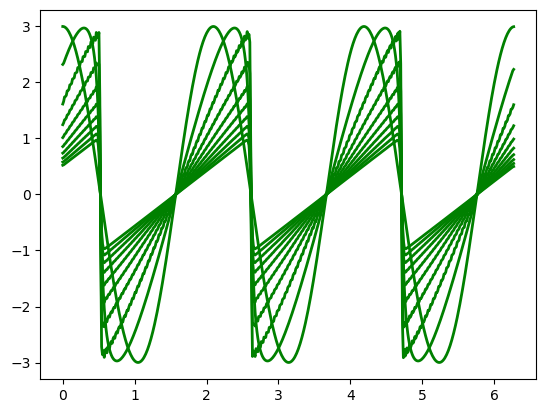

In [ ]:
for ti in range(0, phi2.shape[1], 100):
    grad_x, grad_t = np.gradient(phi2, dx, dt)
    plt.plot(x, grad_x[:, ti], label = 'Solución t1', color='green', linestyle='-', linewidth=2)
plt.show()